<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

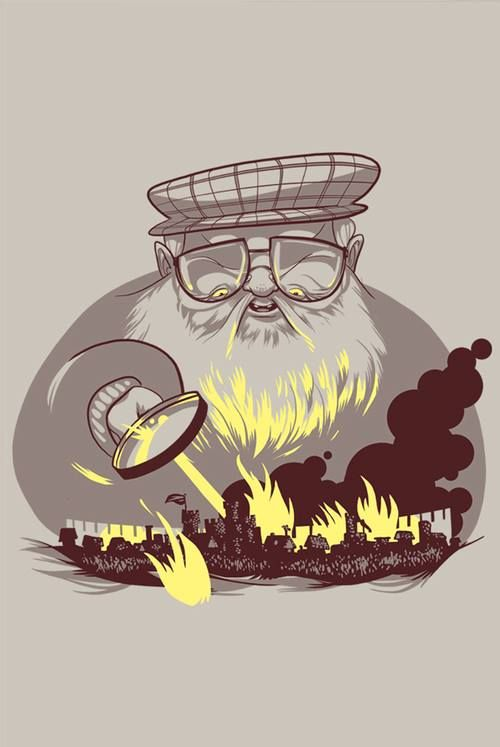

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [662]:
!pip install gdown

!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /Users/nikitarusanov/dev/dls-semester-1/hw1/game_of_thrones_test.csv
100%|██████████████████████████████████████| 37.3k/37.3k [00:00<00:00, 2.91MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /Users/nikitarusanov/dev/dls-semester-1/hw1/game_of_thrones_train.csv
100%|████████████████████████████████████████| 138k/138k [00:00<00:00, 1.99MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [663]:
!pip install pandas matplotlib seaborn scikit-learn

In [664]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [665]:
data = pd.read_csv("./game_of_thrones_train.csv", index_col="S.No")
test_data = pd.read_csv("./game_of_thrones_test.csv", index_col="S.No")

data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [666]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [667]:
data.isnull().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

In [668]:
RARE_TITLE_THRESHOLD = 10


title_counts = data["title"].value_counts()
data["title"] = data["title"].replace(
    to_replace=title_counts.loc[title_counts < RARE_TITLE_THRESHOLD].index.to_list(),
    value="Rare",
)

test_data["title"] = test_data["title"].replace(
    to_replace=title_counts.loc[title_counts < RARE_TITLE_THRESHOLD].index.to_list(),
    value="Rare",
)

test_data.loc[~test_data["title"].isin(data["title"].unique()), "title"] = "Rare"

In [669]:
data["title"] = data["title"].fillna("unknown")
test_data["title"] = test_data["title"].fillna("unknown")


data["title"].value_counts()

title
unknown        840
Ser            306
Rare           301
Maester         29
Archmaester     21
Lord            19
Septon          16
Winterfell      15
Lady            10
Name: count, dtype: int64

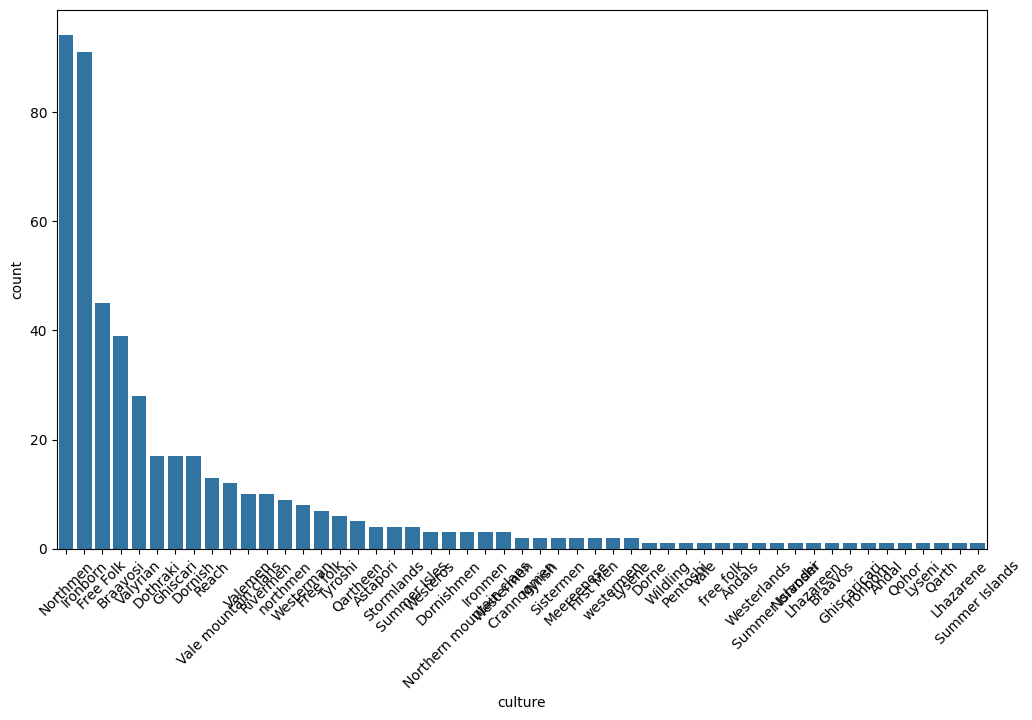

In [670]:
plt.figure(figsize=(12, 7))

culture_counts = data["culture"].value_counts()
sns.barplot(
    culture_counts,
)
plt.xticks(rotation=45)

plt.show()

In [671]:
data["culture"] = data["culture"].fillna(value="unknown")
test_data["culture"] = test_data["culture"].fillna(value="unknown")


data["culture"].value_counts(dropna=False)

culture
unknown                    1069
Northmen                     94
Ironborn                     91
Free Folk                    45
Braavosi                     39
Valyrian                     28
Dornish                      17
Dothraki                     17
Ghiscari                     17
Reach                        13
Vale mountain clans          12
Valemen                      10
Rivermen                     10
northmen                      9
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Summer Isles                  4
Stormlands                    4
Astapori                      4
Ironmen                       3
Dornishmen                    3
Northern mountain clans       3
Westermen                     3
Westeros                      3
Myrish                        2
Crannogmen                    2
Meereenese                    2
First Men                     2
westermen                     2


<Axes: xlabel='dateOfBirth', ylabel='Count'>

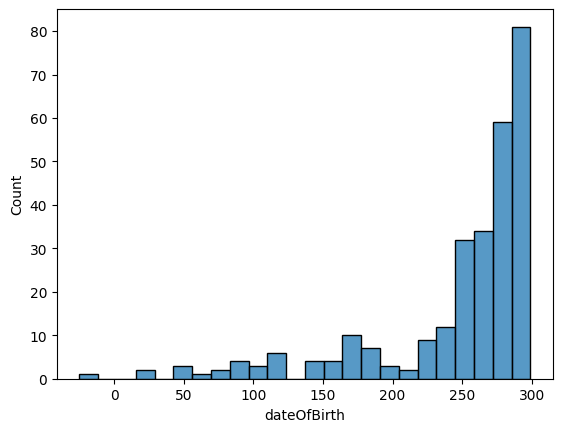

In [672]:
sns.histplot(data["dateOfBirth"])

In [673]:
data["dateOfBirth"] = data["dateOfBirth"].fillna(value=data["dateOfBirth"].median())
test_data["dateOfBirth"] = test_data["dateOfBirth"].fillna(
    value=data["dateOfBirth"].median()
)

data["dateOfBirth"].value_counts(dropna=False)

dateOfBirth
272.0    1279
286.0      12
283.0      10
290.0      10
281.0       9
         ... 
196.0       1
27.0        1
160.0       1
229.0       1
164.0       1
Name: count, Length: 105, dtype: int64

In [674]:
# возраст заполняем модой, так как дату рождения заполняли тоже модой

data["age"] = data["age"].fillna(value=data["age"].mode().item())
test_data["age"] = test_data["age"].fillna(value=data["age"].mode().item())


In [675]:
data["mother"].value_counts()

# слишком много уникадьных значений, чтобы заполнять пропуски модой
# можно заполнить пропуски значением типа "unknown"
# но признак мне кажется не информативным, поэтому я его просто дропну
# аналогично и с "heir" и "father"

mother
Rhaenyra Targaryen        2
Cersei Lannister          2
Alyssa Targaryen          1
Visenya Targaryen         1
Catelyn Stark             1
Cassana Estermont         1
Valaena Velaryon          1
Alicent Hightower         1
Rhaenys Targaryen         1
Mariah Martell            1
Shaera Targaryen          1
Daenaera Velaryon         1
Naerys Targaryen          1
Lady of House Sunderly    1
Betha Blackwood           1
Alyssa Velaryon           1
Name: count, dtype: int64

In [676]:
data["house"].value_counts()

house
House Frey          89
Night's Watch       88
House Stark         56
House Targaryen     40
House Lannister     36
                    ..
House Celtigar       1
House of Ghazeen     1
House Byrch          1
House Hawick         1
House Moore          1
Name: count, Length: 315, dtype: int64

<Axes: xlabel='house', ylabel='count'>

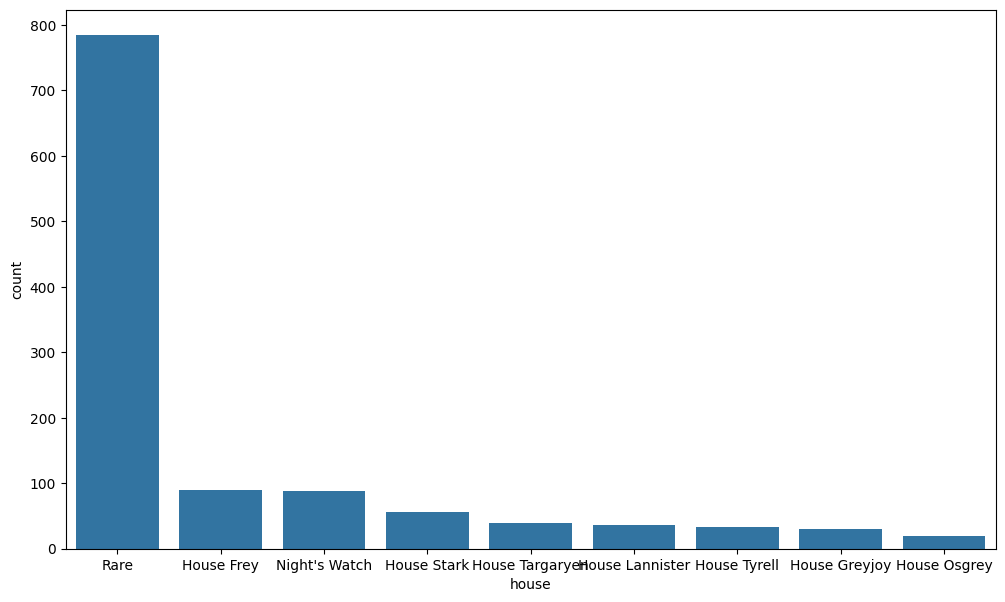

In [677]:
RARE_HOUSE_THRESHOLD = 20


house_counts = data["house"].value_counts()

data["house"] = data["house"].replace(
    to_replace=house_counts.loc[house_counts < RARE_HOUSE_THRESHOLD].index.to_list(),
    value="Rare",
)

test_data["house"] = test_data["house"].replace(
    to_replace=house_counts.loc[house_counts < RARE_HOUSE_THRESHOLD].index.to_list(),
    value="Rare",
)


plt.figure(figsize=(12, 7))

sns.barplot(data["house"].value_counts())

In [678]:
# так все значения распределны относитьельно равномерно заполним пропуски новым значенеим "unknown"

data["house"] = data["house"].fillna(value="unknown")
test_data["house"] = test_data["house"].fillna(value="unknown")
test_data.loc[~test_data["house"].isin(data["house"].unique()), "house"] = "unknown"

data["house"].value_counts()

house
Rare               784
unknown            381
House Frey          89
Night's Watch       88
House Stark         56
House Targaryen     40
House Lannister     36
House Tyrell        33
House Greyjoy       30
House Osgrey        20
Name: count, dtype: int64

In [679]:
data["spouse"].value_counts()

# этот признак тоже не кажется особо информативным, так что удалим его после

spouse
Walder Frey            6
Craster                4
Viserys I Targaryen    2
Kiera of Tyrosh        2
Stevron Frey           2
                      ..
Hosteen Frey           1
Jyanna Frey            1
Leobald Tallhart       1
Lorra Royce            1
Davos Seaworth         1
Name: count, Length: 186, dtype: int64

In [680]:
# в признаках очень много пропусков,
# заполнять какой-либо статистикой не вижу смысла,
# чтобы не вносить дисбаланс в распределение
# поэтому просто дропнем их)
print(data["isAliveMother"].value_counts())
print(data["isAliveFather"].value_counts())
print(data["isAliveHeir"].value_counts())
print(data["isAliveSpouse"].value_counts())

isAliveMother
1.0    12
0.0     6
Name: count, dtype: int64
isAliveFather
0.0    17
1.0     5
Name: count, dtype: int64
isAliveHeir
1.0    14
0.0     7
Name: count, dtype: int64
isAliveSpouse
1.0    158
0.0     42
Name: count, dtype: int64


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [681]:
POPULARITY_THRESHOLD = 0.5

data["isPopular"] = (data["popularity"] > POPULARITY_THRESHOLD).astype(int)
test_data["isPopular"] = (test_data["popularity"] > POPULARITY_THRESHOLD).astype(int)
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,unknown,1,unknown,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,NaN,...,0.0,0.0,NaN,0,0,100.0,11,0.605351,0,1
2,Walder Frey,Rare,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,1
3,Addison Hill,Ser,1,unknown,272.0,NaN,NaN,NaN,Rare,NaN,...,NaN,NaN,NaN,0,1,100.0,0,0.267559,1,0
4,Aemma Arryn,Rare,0,unknown,82.0,NaN,NaN,NaN,Rare,Viserys I Targaryen,...,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0
5,Sylva Santagar,Rare,0,Dornish,276.0,NaN,NaN,NaN,Rare,Eldon Estermont,...,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0


In [682]:
data["boolDeadRelations"] = (data["numDeadRelations"] > 0).astype(int)
test_data["boolDeadRelations"] = (test_data["numDeadRelations"] > 0).astype(int)
data.head(3)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,unknown,1,unknown,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,NaN,...,0.0,NaN,0,0,100.0,11,0.605351,0,1,1
2,Walder Frey,Rare,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,unknown,272.0,NaN,NaN,NaN,Rare,NaN,...,NaN,NaN,0,1,100.0,0,0.267559,1,0,0


In [683]:
data["culture"].unique()

array(['unknown', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn',
       'Free Folk', 'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki',
       'Ghiscari', 'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands'], dtype=object)

In [684]:
# Подсказка
cult = {
    "Summer Islands": ["summer islands", "summer islander", "summer isles"],
    "Ghiscari": ["ghiscari", "ghiscaricari", "ghis"],
    "Asshai": ["asshai'i", "asshai"],
    "Lysene": ["lysene", "lyseni"],
    "Andal": ["andal", "andals"],
    "Braavosi": ["braavosi", "braavos"],
    "Dornish": ["dornishmen", "dorne", "dornish"],
    "Myrish": ["myr", "myrish", "myrmen"],
    "Westermen": ["westermen", "westerman", "westerlands"],
    "Westerosi": ["westeros", "westerosi"],
    "Stormlander": ["stormlands", "stormlander"],
    "Norvoshi": ["norvos", "norvoshi"],
    "Northmen": ["the north", "northmen"],
    "Free Folk": ["wildling", "first men", "free folk"],
    "Qartheen": ["qartheen", "qarth"],
    "Reach": ["the reach", "reach", "reachmen"],
}

for new_name, prev_name in cult.items():
    data.loc[data["culture"].str.lower().isin(prev_name), "culture"] = new_name
    test_data.loc[test_data["culture"].str.lower().isin(prev_name), "culture"] = (
        new_name
    )

test_data.loc[~test_data["culture"].isin(data["culture"].unique()), "culture"] = (
    "unknown"
)
data["culture"].unique()

array(['unknown', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn',
       'Free Folk', 'Northmen', 'Summer Islands', 'Braavosi', 'Dothraki',
       'Ghiscari', 'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Ironmen', 'Qartheen', 'Lysene', 'Westermen', 'Qohor', 'Westerosi',
       'Norvoshi', 'Meereenese', 'Andal', 'Astapori', 'ironborn',
       'Stormlander', 'Valemen', 'Myrish', 'Lhazareen', 'Sistermen',
       'Northern mountain clans', 'Vale', 'Crannogmen', 'Pentoshi'],
      dtype=object)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [685]:
# по причинами описанным выше дропаем следующие фичи

data.drop(
    columns=[
        "mother",
        "father",
        "heir",
        "isAliveMother",
        "isAliveFather",
        "isAliveHeir",
        "isAliveSpouse",
        "spouse",
        "name",
    ],
    inplace=True,
)

test_data.drop(
    columns=[
        "mother",
        "father",
        "heir",
        "isAliveMother",
        "isAliveFather",
        "isAliveHeir",
        "isAliveSpouse",
        "spouse",
        "name",
    ],
    inplace=True,
)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

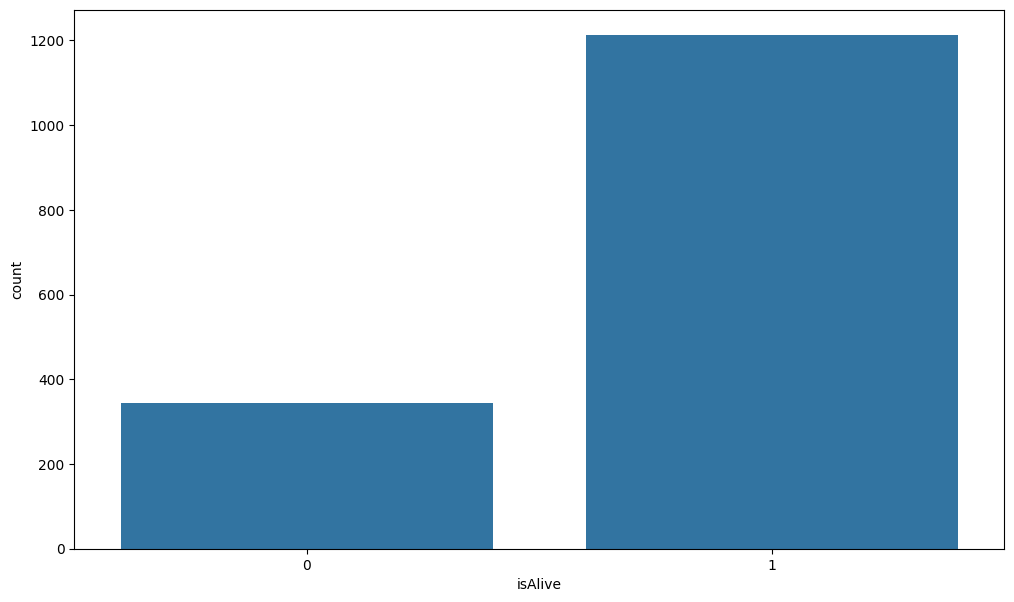

In [686]:
# Таргетная переменная явялестя категориальной
# В распределении таргрета есть дисбаланс

target_counts = data["isAlive"].value_counts()

plt.figure(figsize=(12, 7))

sns.barplot(target_counts)

plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [687]:
cat_features = data.select_dtypes(include=[object]).columns.tolist()
cat_features

['title', 'culture', 'house']

In [688]:
encoder = OneHotEncoder(drop="first", sparse_output=False)

encoder.fit(data[cat_features])

encoded_cat_features_df = pd.DataFrame(
    encoder.transform(data[cat_features]),
    columns=encoder.get_feature_names_out(),
    index=data.index,
)

test_encoded_cat_features_df = pd.DataFrame(
    encoder.transform(test_data[cat_features]),
    columns=encoder.get_feature_names_out(),
    index=test_data.index,
)


data = pd.concat((data, encoded_cat_features_df), axis=1)
test_data = pd.concat((test_data, test_encoded_cat_features_df), axis=1)

In [689]:
num_features = list(
    set(data.select_dtypes(include=[float, int]).columns.to_list())
    - set(encoder.get_feature_names_out().tolist())
)
num_features

['isAlive',
 'age',
 'dateOfBirth',
 'book4',
 'popularity',
 'book1',
 'isNoble',
 'book3',
 'numDeadRelations',
 'isPopular',
 'boolDeadRelations',
 'male',
 'book5',
 'book2',
 'isMarried']

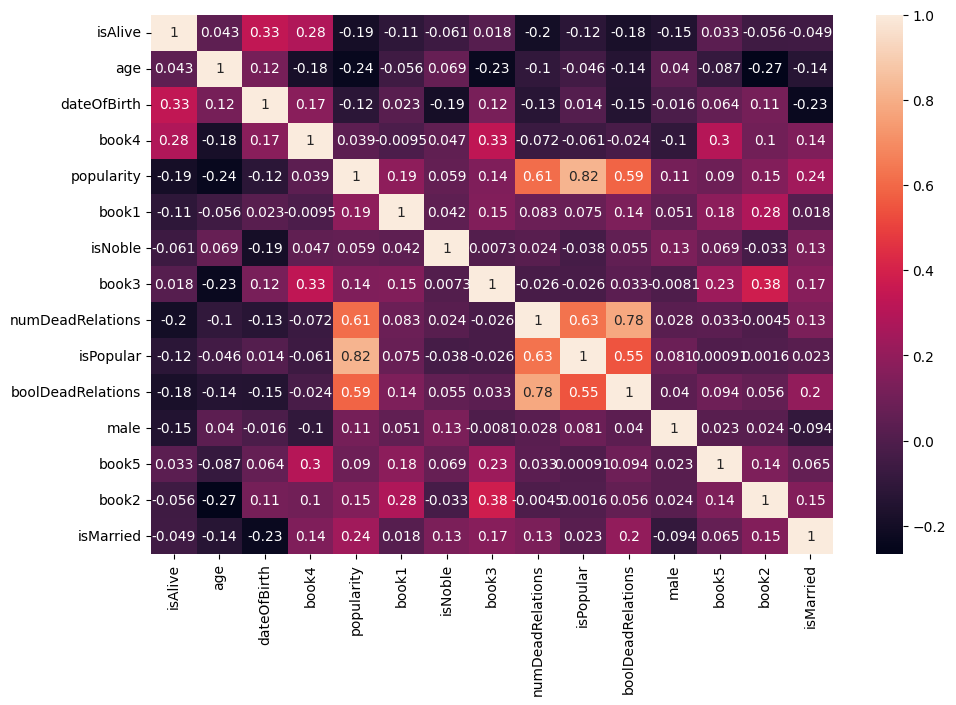

In [690]:
plt.figure(figsize=(11, 7))

sns.heatmap(data[num_features].corr(), annot=True)

plt.show()

# Сильная корреляция есть только между признаками, которые мы сами ввели

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

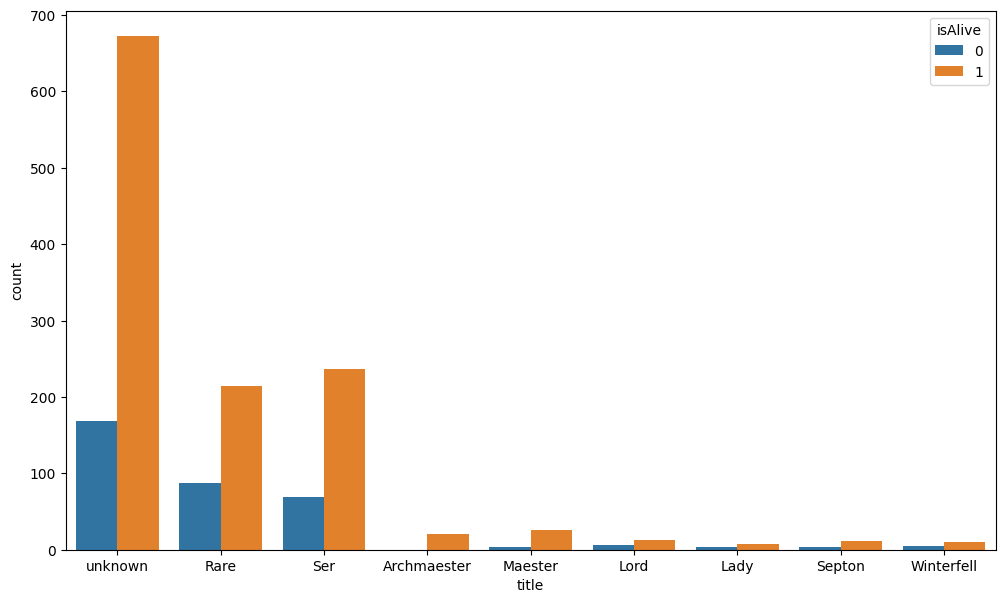

In [691]:
# Корреляицю числовых признаков с целевой переменной мы видели выше
# Посмотрим распределение целевой переменной относительно категориальных признвков

plt.figure(figsize=(12, 7))

sns.countplot(data=data, x="title", hue="isAlive")

pass

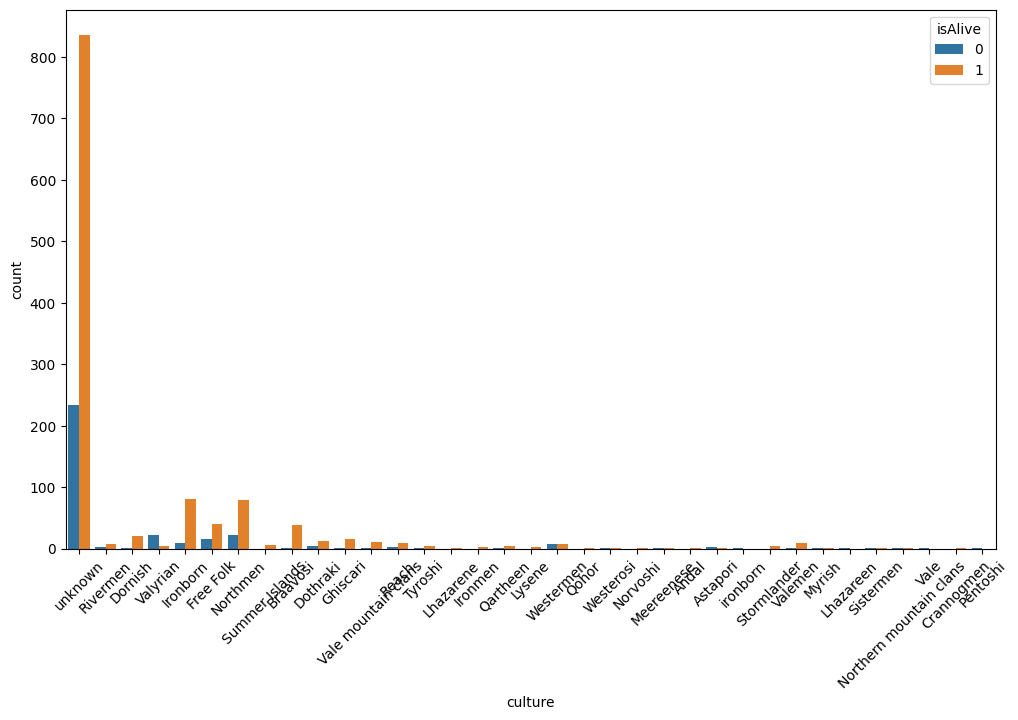

In [692]:
# у некоторых культур персонажей с признаком isAlive = 0 больше
# а в среднем наоборот

plt.figure(figsize=(12, 7))

sns.countplot(data=data, x="culture", hue="isAlive")

plt.xticks(rotation=45)

pass

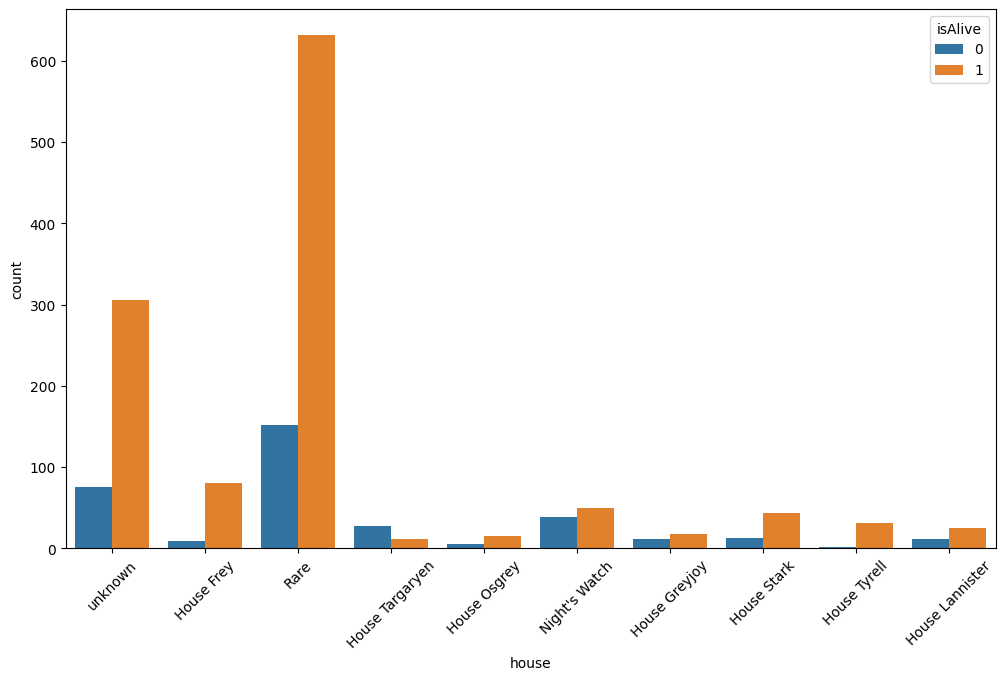

In [693]:
plt.figure(figsize=(12, 7))

sns.countplot(data=data, x="house", hue="isAlive")

plt.xticks(rotation=45)

pass

In [694]:
# больше оригинальные категориальные переменные нам не понадобятся

data.drop(columns=cat_features, inplace=True)
test_data.drop(columns=cat_features, inplace=True)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [695]:
X = data.drop(columns="isAlive").values
y = data["isAlive"].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [696]:
from sklearn.model_selection import train_test_split

In [697]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [698]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [699]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [700]:
from sklearn.preprocessing import StandardScaler

In [701]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [702]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, class_weight="balanced")

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
logistic_y_pred = logistic_regression.predict(X_test_scaled)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [703]:
# Бустинг

ada_boost_model = AdaBoostClassifier()

ada_boost_model.fit(X_train_scaled, y_train)

y_pred = ada_boost_model.predict(X_test_scaled)

In [704]:
# RF

rf_model = RandomForestClassifier(class_weight="balanced")

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

In [705]:
# Гаусовский процесс

gp_model = GaussianProcessClassifier()

gp_model.fit(X_train_scaled, y_train)

y_pred = gp_model.predict(X_test_scaled)

In [706]:
# Наивный баес

nb_model = GaussianNB()

nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

In [707]:
# KNN

knn_model = KNeighborsClassifier(n_neighbors=7, weights="distance")

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

In [708]:
svc_model = SVC(class_weight="balanced")

svc_model.fit(X_train_scaled, y_train)

y_pred = svc_model.predict(X_test_scaled)

In [709]:
tree_model = DecisionTreeClassifier(class_weight="balanced")

tree_model.fit(X_train_scaled, y_train)

y_pred = tree_model.predict(X_test_scaled)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [710]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [711]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7532


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [712]:
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier

models = {
    "AdaBoost": ada_boost_model,
    "Random Forest": rf_model,
    "Gaussian Process": gp_model,
    "Naive Bayes": nb_model,
    "KNN": knn_model,
    "SVC": svc_model,
    "Tree": tree_model,
}


# Шаг 3. Предсказание на тестовых данных

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}\nAccuracy:{accuracy:.4f}\n")

# Шаг 4. Оценка предсказания по метрике accuracy


Model: AdaBoost
Accuracy:0.8013

Model: Random Forest
Accuracy:0.8269

Model: Gaussian Process
Accuracy:0.7821

Model: Naive Bayes
Accuracy:0.7308

Model: KNN
Accuracy:0.8013

Model: SVC
Accuracy:0.7372

Model: Tree
Accuracy:0.7788



In [713]:
# Попробуем немного потюнить RF
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 150, 200],
    "criterion": ["gini", "log_loss"],
    "min_samples_leaf": [1, 3, 5],
    "max_features": [None, "sqrt", "log2"],
}

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params)

grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_

print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 200}
0.8353413654618475


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [714]:
test_data.shape

(389, 65)

In [715]:
data.shape

(1557, 66)

In [716]:
X_test = test_data.values
X_test_scaled = scaler.transform(X_test)

In [717]:
y_pred = best_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [718]:
pd.Series(y_pred)

0      0
1      1
2      1
3      1
4      1
      ..
384    1
385    1
386    1
387    1
388    0
Length: 389, dtype: int64

In [719]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /Users/nikitarusanov/dev/dls-semester-1/hw1/submission.csv
100%|██████████████████████████████████████| 2.74k/2.74k [00:00<00:00, 6.27MB/s]


In [720]:
submission = pd.read_csv("./submission.csv", index_col="S.No")

In [721]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [722]:
submission.loc[:, "isAlive"] = pd.Series(y_pred, index=submission.index)

In [723]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [724]:
submission.to_csv("./new_submission.csv", index=False)